<a href="https://colab.research.google.com/github/Chaarangan/image-classification/blob/main/Image_Classification_using_Tensorflow_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import Model

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2020-12-14 17:01:53--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  14.0MB/s    in 6.0s    

2020-12-14 17:02:01 (14.0 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                 

In [2]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (8, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [3]:
import os
import zipfile

!wget --no-check-certificate \
    https://datasets.simula.no/kvasir/data/kvasir-dataset-v2.zip \
    -O /tmp/kvasir-dataset.zip

local_zip = '/tmp/kvasir-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2020-12-14 17:02:22--  https://datasets.simula.no/kvasir/data/kvasir-dataset-v2.zip
Resolving datasets.simula.no (datasets.simula.no)... 128.39.36.14
Connecting to datasets.simula.no (datasets.simula.no)|128.39.36.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2489312085 (2.3G) [application/zip]
Saving to: ‘/tmp/kvasir-dataset.zip’

/tmp/kvasir-dataset 100%[===================>]   2.32G  4.53MB/s    in 7m 41s  

2020-12-14 17:10:05 (5.14 MB/s) - ‘/tmp/kvasir-dataset.zip’ saved [2489312085/2489312085]



In [4]:
print(len(os.listdir('/tmp/kvasir-dataset-v2/dyed-lifted-polyps/')))

1000


In [5]:
to_create = [
    '/tmp/kvasir',
    '/tmp/kvasir/training',
    '/tmp/kvasir/testing',
    '/tmp/kvasir/training/dyed-lifted-polyps',
    '/tmp/kvasir/training/dyed-resection-margins',
    '/tmp/kvasir/training/esophagitis',
    '/tmp/kvasir/training/normal-cecum',
    '/tmp/kvasir/training/normal-pylorus',
    '/tmp/kvasir/training/normal-z-line',
    '/tmp/kvasir/training/polyps',
    '/tmp/kvasir/training/ulcerative-colitis',
    '/tmp/kvasir/testing/dyed-lifted-polyps',
    '/tmp/kvasir/testing/dyed-resection-margins',
    '/tmp/kvasir/testing/esophagitis',
    '/tmp/kvasir/testing/normal-cecum',
    '/tmp/kvasir/testing/normal-pylorus',
    '/tmp/kvasir/testing/normal-z-line',
    '/tmp/kvasir/testing/polyps',
    '/tmp/kvasir/testing/ulcerative-colitis'
]

for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

/tmp/kvasir created
/tmp/kvasir/training created
/tmp/kvasir/testing created
/tmp/kvasir/training/dyed-lifted-polyps created
/tmp/kvasir/training/dyed-resection-margins created
/tmp/kvasir/training/esophagitis created
/tmp/kvasir/training/normal-cecum created
/tmp/kvasir/training/normal-pylorus created
/tmp/kvasir/training/normal-z-line created
/tmp/kvasir/training/polyps created
/tmp/kvasir/training/ulcerative-colitis created
/tmp/kvasir/testing/dyed-lifted-polyps created
/tmp/kvasir/testing/dyed-resection-margins created
/tmp/kvasir/testing/esophagitis created
/tmp/kvasir/testing/normal-cecum created
/tmp/kvasir/testing/normal-pylorus created
/tmp/kvasir/testing/normal-z-line created
/tmp/kvasir/testing/polyps created
/tmp/kvasir/testing/ulcerative-colitis created


In [6]:
from shutil import copyfile
import random

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)


dyed_lifted_polyps_SOURCE_DIR = "/tmp/kvasir-dataset-v2/dyed-lifted-polyps/"
TRAINING_dyed_lifted_polyps_DIR = "/tmp/kvasir/training/dyed-lifted-polyps/"
TESTING_dyed_lifted_polyps_DIR = "/tmp/kvasir/testing/dyed-lifted-polyps/"

dyed_resection_margins_SOURCE_DIR = "/tmp/kvasir-dataset-v2/dyed-resection-margins/"
TRAINING_dyed_resection_margins_DIR = "/tmp/kvasir/training/dyed-resection-margins/"
TESTING_dyed_resection_margins_DIR = "/tmp/kvasir/testing/dyed-resection-margins/"

esophagitis_SOURCE_DIR = "/tmp/kvasir-dataset-v2/esophagitis/"
TRAINING_esophagitis_DIR = "/tmp/kvasir/training/esophagitis/"
TESTING_esophagitis_DIR = "/tmp/kvasir/testing/esophagitis/"

normal_cecum_SOURCE_DIR = "/tmp/kvasir-dataset-v2/normal-cecum/"
TRAINING_normal_cecum_DIR = "/tmp/kvasir/training/normal-cecum/"
TESTING_normal_cecum_DIR = "/tmp/kvasir/testing/normal-cecum/"

normal_pylorus_SOURCE_DIR = "/tmp/kvasir-dataset-v2/normal-pylorus/"
TRAINING_normal_pylorus_DIR = "/tmp/kvasir/training/normal-pylorus/"
TESTING_normal_pylorus_DIR = "/tmp/kvasir/testing/normal-pylorus/"

normal_z_line_SOURCE_DIR = "/tmp/kvasir-dataset-v2/normal-z-line/"
TRAINING_normal_z_line_DIR = "/tmp/kvasir/training/normal-z-line/"
TESTING_normal_z_line_DIR = "/tmp/kvasir/testing/normal-z-line/"

polyps_SOURCE_DIR = "/tmp/kvasir-dataset-v2/polyps/"
TRAINING_polyps_DIR = "/tmp/kvasir/training/polyps/"
TESTING_polyps_DIR = "/tmp/kvasir/testing/polyps/"

ulcerative_colitis_SOURCE_DIR = "/tmp/kvasir-dataset-v2/ulcerative-colitis/"
TRAINING_ulcerative_colitis_DIR = "/tmp/kvasir/training/ulcerative-colitis/"
TESTING_ulcerative_colitis_DIR = "/tmp/kvasir/testing/ulcerative-colitis/"

split_size = .9
split_data(dyed_lifted_polyps_SOURCE_DIR, TRAINING_dyed_lifted_polyps_DIR, TESTING_dyed_lifted_polyps_DIR, split_size)
split_data(dyed_resection_margins_SOURCE_DIR, TRAINING_dyed_resection_margins_DIR, TESTING_dyed_resection_margins_DIR, split_size)
split_data(esophagitis_SOURCE_DIR, TRAINING_esophagitis_DIR, TESTING_esophagitis_DIR, split_size)
split_data(normal_cecum_SOURCE_DIR, TRAINING_normal_cecum_DIR, TESTING_normal_cecum_DIR, split_size)
split_data(normal_pylorus_SOURCE_DIR, TRAINING_normal_pylorus_DIR, TESTING_normal_pylorus_DIR, split_size)
split_data(normal_z_line_SOURCE_DIR, TRAINING_normal_z_line_DIR, TESTING_normal_z_line_DIR, split_size)
split_data(polyps_SOURCE_DIR, TRAINING_polyps_DIR, TESTING_polyps_DIR, split_size)
split_data(ulcerative_colitis_SOURCE_DIR, TRAINING_ulcerative_colitis_DIR, TESTING_ulcerative_colitis_DIR, split_size)

In [7]:
print(len(os.listdir('/tmp/kvasir/training/dyed-lifted-polyps/')))
print(len(os.listdir('/tmp/kvasir/testing/dyed-lifted-polyps/')))

print(len(os.listdir('/tmp/kvasir/training/dyed-resection-margins/')))
print(len(os.listdir('/tmp/kvasir/testing/dyed-resection-margins/')))

print(len(os.listdir('/tmp/kvasir/training/esophagitis/')))
print(len(os.listdir('/tmp/kvasir/testing/esophagitis/')))

print(len(os.listdir('/tmp/kvasir/training/normal-cecum/')))
print(len(os.listdir('/tmp/kvasir/testing/normal-cecum/')))

print(len(os.listdir('/tmp/kvasir/training/normal-pylorus/')))
print(len(os.listdir('/tmp/kvasir/testing/normal-pylorus/')))

print(len(os.listdir('/tmp/kvasir/training/normal-z-line/')))
print(len(os.listdir('/tmp/kvasir/testing/normal-z-line/')))

print(len(os.listdir('/tmp/kvasir/training/polyps/')))
print(len(os.listdir('/tmp/kvasir/testing/polyps/')))

print(len(os.listdir('/tmp/kvasir/training/ulcerative-colitis/')))
print(len(os.listdir('/tmp/kvasir/testing/ulcerative-colitis/')))

900
100
900
100
900
100
900
100
900
100
900
100
900
100
900
100


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/tmp/kvasir/training'
validation_dir = '/tmp/kvasir/testing'

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 64,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 64,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150, 150))

Found 7200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [9]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 2,
            epochs = 20,
            verbose = 2)

Epoch 1/20
2/2 - 15s - loss: 21.6515 - accuracy: 0.1484 - val_loss: 36.0914 - val_accuracy: 0.1875
Epoch 2/20
2/2 - 14s - loss: 38.3071 - accuracy: 0.1406 - val_loss: 22.2292 - val_accuracy: 0.2875
Epoch 3/20
2/2 - 14s - loss: 17.4178 - accuracy: 0.2500 - val_loss: 8.6795 - val_accuracy: 0.3837
Epoch 4/20
2/2 - 14s - loss: 8.1325 - accuracy: 0.3281 - val_loss: 4.6504 - val_accuracy: 0.4050
Epoch 5/20
2/2 - 14s - loss: 4.6050 - accuracy: 0.4297 - val_loss: 2.4045 - val_accuracy: 0.4275
Epoch 6/20
2/2 - 13s - loss: 2.5168 - accuracy: 0.4766 - val_loss: 1.4118 - val_accuracy: 0.6075
Epoch 7/20
2/2 - 13s - loss: 1.7438 - accuracy: 0.5156 - val_loss: 2.5595 - val_accuracy: 0.6000
Epoch 8/20
2/2 - 13s - loss: 2.3853 - accuracy: 0.5938 - val_loss: 1.0549 - val_accuracy: 0.6250
Epoch 9/20
2/2 - 13s - loss: 1.3737 - accuracy: 0.5781 - val_loss: 1.8757 - val_accuracy: 0.5263
Epoch 10/20
2/2 - 13s - loss: 1.9238 - accuracy: 0.5078 - val_loss: 1.0500 - val_accuracy: 0.6662
Epoch 11/20
2/2 - 13s - 

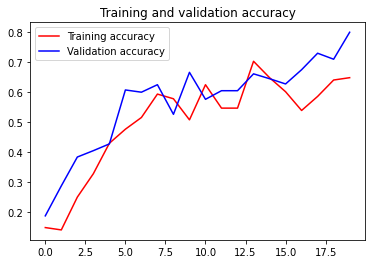

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()